In [55]:
from autocluster import AutoCluster
from sklearn import datasets
from collections import Counter
from sklearn.metrics.cluster import v_measure_score
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
df = pd.DataFrame(datasets.load_digits()['data'])
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [57]:
# df = pd.read_csv("../data/Financial_Distress.csv").drop(columns=['Time', 'Company', 'Financial Distress', 'class'])
# df.head(5)

In [65]:
Mapper.getClass('AffinityPropagation').params

[damping, Type: UniformFloat, Range: [0.5, 1.0], Default: 0.5,
 affinity, Type: Categorical, Choices: {euclidean}, Default: euclidean]

In [69]:
cluster = AutoCluster()
smac_obj, opt_cfg = cluster.fit_raw_data(df=df, numerical_cols=list(df.columns), n_evaluations=5)

Configuration space object:
  Hyperparameters:
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    clustering_choice, Type: Categorical, Choices: {KMeans, GaussianMixture, MiniBatchKMeans, AgglomerativeClustering}, Default: KMeans
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    dim_reduction_choice, Type: Categorical, Choices: {TSNE, PCA, IncrementalPCA, FastICA, TruncatedSVD}, Default: TSNE
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.0], Default

/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '') > 0
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:70: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:79: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size


Fitting configuration: 
{'perplexity___TSNE': 26.753543531294703, 'n_clusters___KMeans': 10, 'random_state___TSNE': 1, 'clustering_choice': 'KMeans', 'n_components___TSNE': 2, 'early_exaggeration___TSNE': 17.984440031725132, 'dim_reduction_choice': 'TSNE'}
Score obtained by this configuration: -0.5995671153068542
Fitting configuration: 
{'perplexity___TSNE': 9.599098048782672, 'n_clusters___KMeans': 5, 'random_state___TSNE': 4, 'clustering_choice': 'KMeans', 'n_components___TSNE': 2, 'early_exaggeration___TSNE': 11.36024780983317, 'dim_reduction_choice': 'TSNE'}
Score obtained by this configuration: -0.4154805541038513
Fitting configuration: 
{'perplexity___TSNE': 8.438936747684515, 'n_clusters___KMeans': 5, 'random_state___TSNE': 4, 'clustering_choice': 'KMeans', 'n_components___TSNE': 2, 'early_exaggeration___TSNE': 11.23015234775081, 'dim_reduction_choice': 'TSNE'}
Score obtained by this configuration: -0.4212239980697632
Fitting configuration: 
{'random_state___GaussianMixture': 7,

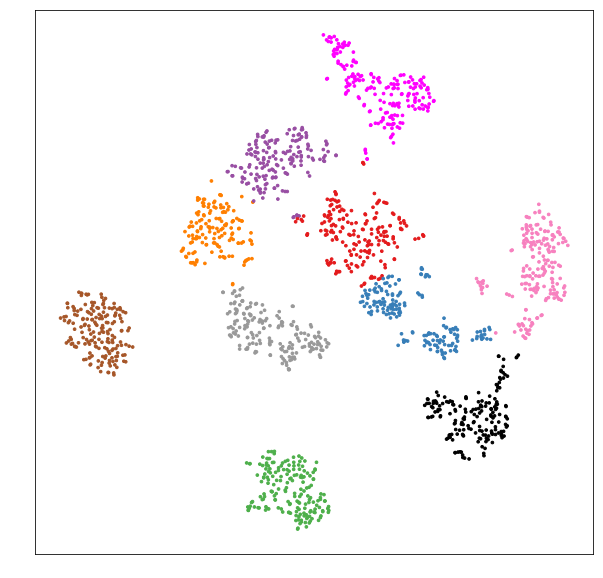

In [70]:
predictions = cluster.predict(df.to_numpy())

In [27]:
Counter(predictions)

Counter({0: 176,
         1: 178,
         2: 179,
         3: 196,
         4: 202,
         5: 183,
         6: 201,
         7: 145,
         8: 178,
         9: 159})

In [26]:
v_measure_score(predictions, datasets.load_digits()['target'])

0.8751429204469261

In [32]:
AutoCluster.__dict__

mappingproxy({'__dict__': <attribute '__dict__' of 'AutoCluster' objects>,
              '__doc__': None,
              '__init__': <function autocluster.AutoCluster.__init__(self, logger=None)>,
              '__module__': 'autocluster',
              '__weakref__': <attribute '__weakref__' of 'AutoCluster' objects>,
              '_log': <function autocluster.AutoCluster._log(self, string)>,
              'fit': <function autocluster.AutoCluster.fit(self, X, cluster_alg_ls=['KMeans', 'DBSCAN'], dim_reduction_alg_ls=[], n_evaluations=50, seed=30, run_obj='quality', cutoff_time=60, shared_model=True, n_parallel_runs=3, initial_configurations=None, evaluator=<function AutoCluster.<lambda> at 0x7ffdeec30bf8>)>,
              'fit_raw_data': <function autocluster.AutoCluster.fit_raw_data(self, df, n_evaluations=30, seed=27, cutoff_time=50, numerical_cols=[], categorical_cols=[], warmstart=True, general_metafeatures=['all'], numeric_metafeatures=[], categorical_metafeatures=[])>,
         

In [40]:
from utils.metafeatures import Metafeatures
import numpy as np

In [41]:
Metafeatures.__dict__['numberOfInstances'].__get__(object)(np.array([0]))

1.0

In [51]:
d = {string: func for string, func in (Metafeatures.__dict__).items() if '_' not in string}
d

{'PCAFractionOfComponentsFor95PercentVariance': <staticmethod at 0x7ffe0ff497b8>,
 'PCAKurtosisFirstPC': <staticmethod at 0x7ffe0ff49748>,
 'PCASkewnessFirstPC': <staticmethod at 0x7ffe0ff496d8>,
 'datasetRatio': <staticmethod at 0x7ffe0ff63cf8>,
 'entropyOfClasses': <staticmethod at 0x7ffe0ff49668>,
 'firstQuartileCorrelation': <staticmethod at 0x7ffdef63fcf8>,
 'firstQuartileCovariance': <staticmethod at 0x7ffe0ff49828>,
 'firstQuartileEntropy': <staticmethod at 0x7ffe0ff49940>,
 'firstQuartileKurtosis': <staticmethod at 0x7ffe0ff63358>,
 'firstQuartileMutualInformation': <staticmethod at 0x7ffe0ff499e8>,
 'firstQuartileSkewness': <staticmethod at 0x7ffe0ff63630>,
 'isMissingValues': <staticmethod at 0x7ffe0ff639e8>,
 'logDatasetRatio': <staticmethod at 0x7ffe0ff63b70>,
 'logNumberOfFeatures': <staticmethod at 0x7ffe0ff63d30>,
 'logNumberOfInstances': <staticmethod at 0x7ffe0ff63c18>,
 'maxCorrelation': <staticmethod at 0x7ffe0ff63160>,
 'maxCovariance': <staticmethod at 0x7ffe0ff490

In [54]:
d['numberOfInstances'].__get__(object)(np.array([0]))

1.0